In [1]:
%matplotlib inline

In [2]:
import tifffile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from torchvision_multi import transform_multi
from torchvision_multi.datasets import image_loader

this module is design for multi-channel image tranform of pytorch. for now all the input image should be numpy.ndarray.

there are three way to use this module.

1. independence use: you can use the function or class independently.
2. input transform: purpose for image classification
    - single label classification
    - multi label classification
3. input and target transform simultaneously: purpose for image semantic segmentation and instance segmentation


## 1. Independence Use
you can use this module independence 

In [3]:
# loading data and show the original image
img_tif = tifffile.imread('./sample-data/7-channel.tif')
img_jpg = Image.open('./sample-data/2007_000129.jpg')
# img_tif = img_tif.astype(np.float, copy=False) # covert the original image float32 to uint32

float32 (461, 633, 7)


(<matplotlib.figure.Figure at 0x7fe8f92369e8>,
 <matplotlib.image.AxesImage at 0x7fe8f9104358>)

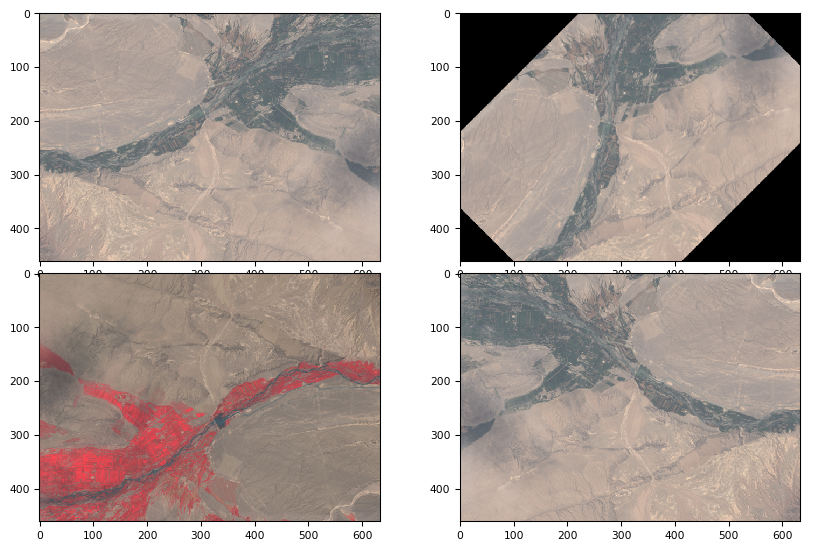

In [4]:
#flip the image and the plot them
fig = plt.figure(figsize=(16,8))
img_tif_flip_0 = transform_multi.rotate(img_tif, 45)
img_tif_flip_neg = transform_multi.flip(img_tif, -1)
img_tif_flip_pos = transform_multi.flip(img_tif, 1)
print(img_tif_flip_0.dtype, img_tif_flip_0.shape)
tifffile.imshow(img_tif[:,:,[3,2,1]], subplot=221)  #original
tifffile.imshow(img_tif_flip_0[:,:,[3,2,1]], figure=fig, subplot=222)  #top bottom
tifffile.imshow(img_tif_flip_neg[:,:,[4,3,2]], figure=fig, subplot=223)  #left right 
tifffile.imshow(img_tif_flip_pos[:,:,[3,2,1]], figure=fig, subplot=224)#top bottom and then left right

## 2. input transform
purpose for image classification
 - single label classification
 - multi label classification

In [5]:
import torch
from torch.utils.data import Dataset, DataLoader

0.6 0.5 32
0.0 0.5 143
0.3 0.5 34
0.8 0.5 116
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691


0.4 0.5 187
0.5 0.5 258
0.6 0.5 100
0.3 0.5 133
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691


0.4 0.5 203
0.9 0.5 173
0.7 0.5 107
0.4 0.5 52
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691
<class 'numpy.ndarray'> 2042691




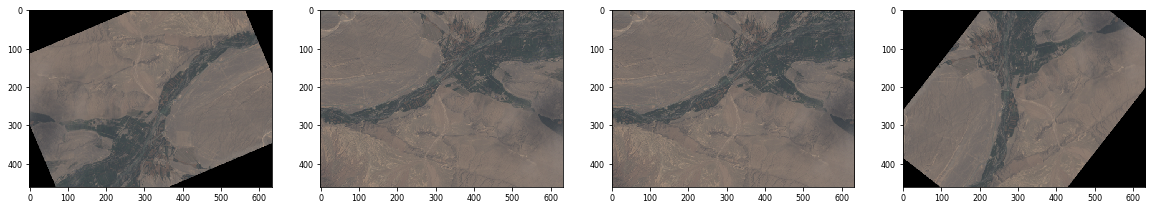

In [6]:
fig = plt.figure(figsize=(20,6))

batch_size=4
transform = transform_multi.Compose([
    transform_multi.RandomRotate(0.5),
    transform_multi.Lambda(lambda x: transform_multi.to_tensor(x))
])

trainset = image_loader.SingleLabelImageLoader(
    root='./sample-data/', lstpath='./sample-data/parse_single_lstfile_tiff.lst',
    filetype='tif', transform=transform,
    )
trainloader = DataLoader(dataset=trainset,batch_size=batch_size,shuffle=False)

for step, (inputs, targets) in enumerate(trainloader):
#     print('batch: {} ........'.format(idx))
#     print(type(images), images.shape)
#     print(type(targets), targets.shape)
    
    # Variable, cuda
    # net feed forward
    # loss
    # back propagation
     
    #plot
    for idx, item in enumerate(inputs):
        
        item = torch.squeeze(item,0)
        img_ndarr = transform_multi.to_ndarray(item)
        subplot = int(''.join(str(x) for x in [1, batch_size, idx+1]))
        print(type(img_ndarr), img_ndarr.size)
        tifffile.imshow(img_ndarr[:,:,[3,2,1]], figure=fig, subplot=subplot)  
    plt.savefig('./sample-data/plot/{}.png'.format(step), bbox_inches='tight')
    print('\n')


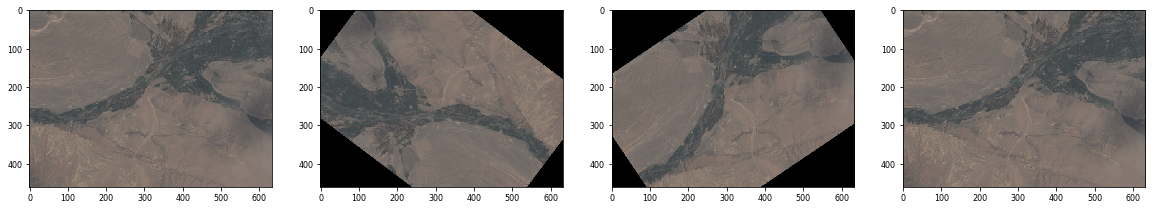

In [7]:
from IPython.display import Image
Image("sample-data/plot/0.png")

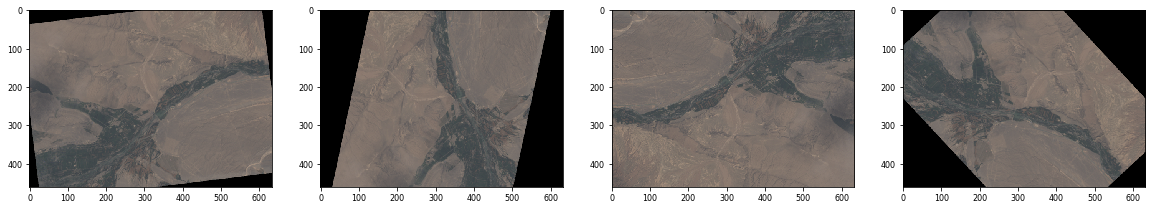

In [8]:
Image("sample-data/plot/1.png")

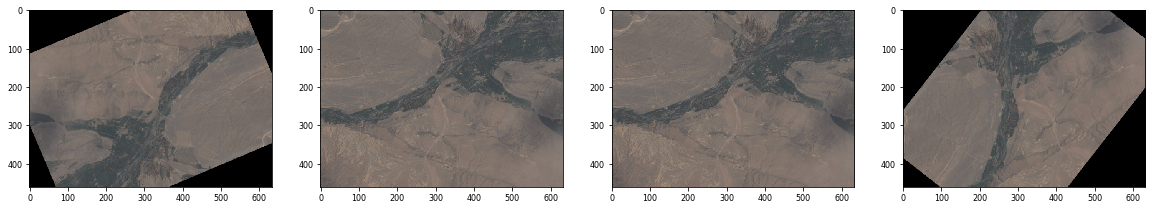

In [9]:
Image("sample-data/plot/2.png")

---

## 3. input and target transform simultaneously

purpose for image semantic segmentation and instance segmentation